In [1]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                  
import cv2             
import tensorflow as tf                          
from PIL import Image
import os                                        
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                    
import warnings

In [2]:
image_paths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".png"):
            image_paths.append(os.path.join(dirname, filename))

In [3]:
data = []
labels = []
classes = 43
        
for i in range(classes):
    #path = os.path.join(os.getcwd(),'train',str(i))
    #images = os.listdir(path)
    for img in image_paths[:50]:
        image = Image.open(img)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)

#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(2150, 30, 30, 4) (2150,)


In [4]:
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
data = np.array(data)
labels = np.array(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1720, 30, 30, 4) (430, 30, 30, 4) (1720,) (430,)


In [6]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1720, 30, 30, 4) (430, 30, 30, 4) (1720, 43) (430, 43)


In [7]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

2022-09-05 07:14:20.513772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 07:14:20.646153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 07:14:20.646965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 07:14:20.648885: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        3232      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))
#Final trainig of model

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/2


2022-09-05 07:14:23.571745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-05 07:14:24.945144: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


54/54 [==============================] - 8s 9ms/step - loss: 9.0971 - accuracy: 0.0244 - val_loss: 3.7644 - val_accuracy: 0.0256
Epoch 2/2
54/54 [==============================] - 0s 5ms/step - loss: 3.7658 - accuracy: 0.0203 - val_loss: 3.7637 - val_accuracy: 0.0140


In [11]:
model.save("Trafic_signs_model.h5")

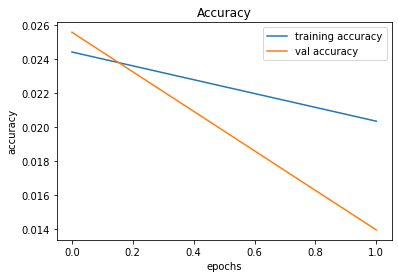

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

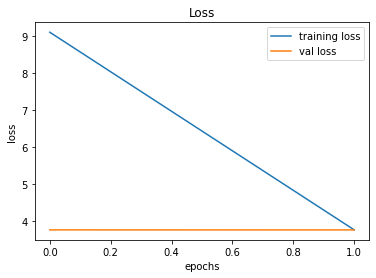

In [13]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [15]:
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".png"):
            imgs.append(os.path.join(dirname, filename))

data=[]

for img in imgs[:50]:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)